In [1]:
%gui qt

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
from ipywidgets import interact
import seaborn as sns
sns.set_context('poster')

In [4]:
%load_ext autoreload

In [5]:
%autoreload 2

### FPGA and Probe Configuration

./spkDect_Sort_Demo.ipynb

In [6]:
from spiketag.base import ProbeFactory, bload
from spiketag.mvc  import Sorter
from spiketag.fpga import FPGA

#### Probe Parameters

In [7]:
nCh = 160
fs = 25000.
tetrodes = ProbeFactory.genTetrodeProbe(fs=fs, n_ch=nCh)
tetrodes.fromfile('./open-ephys-load/40 tetrode_channel_map')

In [8]:
tetrodes.reorder_by_chip = True
tetrodes._nchips = 5

In [9]:
tetrodes.ch_hash(7)

array([6, 7, 8, 9])

#### FPGA

#### threshold and offset

In [10]:
config = FPGA(probe=tetrodes, offset_value=32, thres_value=-500)

In [11]:
config.ch_ugp[14]

(0, 1, 14, 15)

In [12]:
config.thres

threshold of ch0 is -500.0
threshold of ch1 is -500.0
threshold of ch2 is -500.0
threshold of ch3 is -500.0
threshold of ch4 is -500.0
threshold of ch5 is -500.0
threshold of ch6 is -500.0
threshold of ch7 is -500.0
threshold of ch8 is -500.0
threshold of ch9 is -500.0
threshold of ch10 is -500.0
threshold of ch11 is -500.0
threshold of ch12 is -500.0
threshold of ch13 is -500.0
threshold of ch14 is -500.0
threshold of ch15 is -500.0
threshold of ch16 is -500.0
threshold of ch17 is -500.0
threshold of ch18 is -500.0
threshold of ch19 is -500.0
threshold of ch20 is -500.0
threshold of ch21 is -500.0
threshold of ch22 is -500.0
threshold of ch23 is -500.0
threshold of ch24 is -500.0
threshold of ch25 is -500.0
threshold of ch26 is -500.0
threshold of ch27 is -500.0
threshold of ch28 is -500.0
threshold of ch29 is -500.0
threshold of ch30 is -500.0
threshold of ch31 is -500.0
threshold of ch32 is -500.0
threshold of ch33 is -500.0
threshold of ch34 is -500.0
threshold of ch35 is -500.0
th

threshold enable status: True

#### channel group

In [13]:
from spiketag.fpga import bram_thres, offset

In [14]:
chgpNo = bram_thres.chgpNo(nCh=160)

In [15]:
for i in range(160):
    chgpNo[i] = tetrodes.belong_group(i)

In [16]:
chgpNo

chgpNo of ch0 is 9.0
chgpNo of ch1 is 9.0
chgpNo of ch2 is 8.0
chgpNo of ch3 is 8.0
chgpNo of ch4 is 7.0
chgpNo of ch5 is 7.0
chgpNo of ch6 is 6.0
chgpNo of ch7 is 6.0
chgpNo of ch8 is 6.0
chgpNo of ch9 is 6.0
chgpNo of ch10 is 7.0
chgpNo of ch11 is 7.0
chgpNo of ch12 is 8.0
chgpNo of ch13 is 8.0
chgpNo of ch14 is 9.0
chgpNo of ch15 is 9.0
chgpNo of ch16 is 10.0
chgpNo of ch17 is 10.0
chgpNo of ch18 is 11.0
chgpNo of ch19 is 11.0
chgpNo of ch20 is 12.0
chgpNo of ch21 is 12.0
chgpNo of ch22 is 13.0
chgpNo of ch23 is 13.0
chgpNo of ch24 is 13.0
chgpNo of ch25 is 13.0
chgpNo of ch26 is 12.0
chgpNo of ch27 is 12.0
chgpNo of ch28 is 11.0
chgpNo of ch29 is 11.0
chgpNo of ch30 is 10.0
chgpNo of ch31 is 10.0
chgpNo of ch32 is 2.0
chgpNo of ch33 is 2.0
chgpNo of ch34 is 3.0
chgpNo of ch35 is 3.0
chgpNo of ch36 is 4.0
chgpNo of ch37 is 4.0
chgpNo of ch38 is 5.0
chgpNo of ch39 is 5.0
chgpNo of ch40 is 2.0
chgpNo of ch41 is 2.0
chgpNo of ch42 is 3.0
chgpNo of ch43 is 3.0
chgpNo of ch44 is 4.0
chgp

chgpNo done

### Sorting

In [17]:
!cp spk.bin mua.bin.spk

In [18]:
sorter = Sorter('/disk0/testbench/mua.bin', 
                probe=tetrodes, 
                fet_method='weighted-pca', fetlen=4,
                clu_method='hdbscan',
                n_jobs=24)

2017-10-18 17:38:02,870 - spiketag - INFO - load mua data
2017-10-18 17:38:02,873 - spiketag - INFO - #############  load data  ###################
2017-10-18 17:38:02,874 - spiketag - INFO - /disk0/testbench/mua.bin loaded, it contains: 
2017-10-18 17:38:02,876 - spiketag - INFO - 442344 * 160 points (283100160 bytes) 
2017-10-18 17:38:02,878 - spiketag - INFO - 160 channels with sampling rate of 25000.0000 
2017-10-18 17:38:02,879 - spiketag - INFO - 17.694 secs (0.295 mins) of data
2017-10-18 17:38:02,881 - spiketag - INFO - #############################################
2017-10-18 17:38:03,080 - spiketag - INFO - reordered with nchips=5 and nch_perchip=32
2017-10-18 17:38:03,270 - spiketag - INFO - raw data have 30755 spks
2017-10-18 17:38:03,271 - spiketag - INFO - removing all spks on group which len(spks) less then fetlen
2017-10-18 17:38:03,280 - spiketag - INFO - removed all spks on these groups: {16: 3, 34: 3, 5: 1}
2017-10-18 17:38:03,281 - spiketag - INFO - grouping spike ti

In [43]:
sorter.run()

2017-10-18 17:40:33,049 - spiketag - INFO - received model modified event, refine spikes[group=0, global_ids=[ 130  170  181  184  196  198  199  240  353  573  588  632  633  648  683
  685  686  694  699  701  702  704  727  728  730  737  746  753  755  772
  774  775  776  781  834  835  836  837  865  866  875  885  886  888  890
  891  905  912  915  917  918  919  920  921  947  977  984  987  990  998
 1003 1011 1046 1053 1059]]
2017-10-18 17:40:33,056 - spiketag - INFO - the result of refine: [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
2017-10-18 17:40:37,882 - spiketag - INFO - received model modified event, refine spikes[group=0, global_ids=[ 170  196  198  199  353  632  633  648  683  694  701  727  730  737  746
  753  755  772  775  776  781  835  866  875  885  888  890  912  918  919
  947  977  984  987  990 1059]]
2017-10-18 17:40:37,888 - spiketag - INFO - the result of refine: 

In [20]:
spks = np.fromfile('./spk.bin', dtype=np.int32).reshape(-1,2).T
spks

array([[    14,     15,     15, ..., 351943, 351946, 351963],
       [   151,     67,    107, ...,     26,    148,     67]], dtype=int32)

In [21]:
sorter.show_mua(chs=tetrodes[28], spks=spks)

## spikes stack and fet

In [20]:
r = sorter.model.spk[7]

In [21]:
x = r.transpose(0,2,1).ravel().reshape(-1, r.shape[1]*r.shape[2])
x.shape

(1496, 76)

In [22]:
fet = sorter.model.fet[7]
fet.shape

(1496, 4)

### Test for individual spikes

In [23]:
_pca_comp, _shift, _scale = sorter.construct_transformer(groupNo=7, ndim=4)

In [24]:
_fet = sorter._transform(x, _pca_comp, _shift, _scale)

In [25]:
np.allclose(_fet, fet)

True

In [26]:
print x.shape, _pca_comp.shape, _shift.shape, _scale.shape

(1496, 76) (76, 4) (4,) ()


76 dims -> 6 dims -> shift -> scale

In [27]:
_pca_comp, _shift, _scale = sorter.construct_transformer(groupNo=0, ndim=4)

In [28]:
_shift

array([-2202.87911546, -2738.18231552,   214.78760417,  -121.46517397])

In [29]:
config.shift[0] = _shift
config.shift[0]

array([-2202.87902832, -2738.18225098,   214.78759766,  -121.46508789])

### Configure FPGA transformer params

In [30]:
_pca_comp, _shift, _scale = sorter.construct_transformer(groupNo=7, ndim=4)

In [31]:
config._config_FPGA_transformer(grpNo=7, P=_pca_comp, b=_shift, a=_scale)

In [32]:
config.probe.n_group

40

In [33]:
config.transfomer_constructed

{0: 0,
 1: 0,
 2: 0,
 3: 0,
 4: 0,
 5: 0,
 6: 0,
 7: 1,
 8: 0,
 9: 0,
 10: 0,
 11: 0,
 12: 0,
 13: 0,
 14: 0,
 15: 0,
 16: 0,
 17: 0,
 18: 0,
 19: 0,
 20: 0,
 21: 0,
 22: 0,
 23: 0,
 24: 0,
 25: 0,
 26: 0,
 27: 0,
 28: 0,
 29: 0,
 30: 0,
 31: 0,
 32: 0,
 33: 0,
 34: 0,
 35: 0,
 36: 0,
 37: 0,
 38: 0,
 39: 0}

#### `bram_xike` module in FPGA is the memory map for `/dev/xillybus_template_32` channel

In [34]:
for i in sorter.model.groups:
    _pca_comp, _shift, _scale = sorter.construct_transformer(groupNo=i, ndim=4)
    config._config_FPGA_transformer(grpNo=i, P=_pca_comp, b=_shift, a=_scale)
    print i,
    print np.allclose(config.pca[i], _pca_comp, atol=1e-3),
    print np.allclose(config.shift[i], _shift,  atol=1e-3),
    print np.allclose(config.scale[i], _scale,  atol=1e-3)
    

0 True True True
1 True True True
2 True True True
3 True True True
4 True True True
6 True True True
7 True True True
8 True True True
9 True True True
10 True True True
11 True True True
12 True True True
13 True True True
14 True True True
15 True True True
17 True True True
18 True True True
19 True True True
20 True True True
21 True True True
22 True True True
23 True True True
24 True True True
25 True True True
26 True True True
27 True True True
28 True True True
29 True True True
30 True True True
31 True True True
32 True True True
33 True True True
35 True True True
36 True True True
37 True True True
38 True True True
39 True True True


In [35]:
config.transfomer_constructed

{0: 1,
 1: 1,
 2: 1,
 3: 1,
 4: 1,
 5: 0,
 6: 1,
 7: 1,
 8: 1,
 9: 1,
 10: 1,
 11: 1,
 12: 1,
 13: 1,
 14: 1,
 15: 1,
 16: 0,
 17: 1,
 18: 1,
 19: 1,
 20: 1,
 21: 1,
 22: 1,
 23: 1,
 24: 1,
 25: 1,
 26: 1,
 27: 1,
 28: 1,
 29: 1,
 30: 1,
 31: 1,
 32: 1,
 33: 1,
 34: 0,
 35: 1,
 36: 1,
 37: 1,
 38: 1,
 39: 1}

### Use vivado-ila to extract `pca_stream` and `pca_final`

In [36]:
sorter.model.mua.pivotal_pos

array([[    13,     15,     15, ..., 442267, 442274, 442321],
       [    31,     54,    156, ...,    155,     17,     83]], dtype=int32)

In [37]:
np.array(np.where(sorter.model.mua.bf.npmm%2==1))

array([[    13,     15,     15, ..., 442274, 442321, 442333],
       [    31,     54,    156, ...,     17,     83,    148]])

In [38]:
_.shape

(2, 30756)

In [39]:
sorter.model.mua.bf.npmm

memmap([[ -628102,  -833124,  -476458, ...,  -147676,   300604,   985094],
       [ -928854,  -928992,  -177398, ...,    -3232,   114146,  1298050],
       [-1143848,  -926794,    73860, ...,   168064,  -149708,  1531864],
       ..., 
       [-1138924,  -294194,  -264138, ...,    50434,   768162,   363522],
       [-1381292,  -617466,   -12122, ...,   319270,   868630,   151306],
       [-1639966, -1038782,   238116, ...,   499614,   862034,   -81796]], dtype=int32)

In [40]:
spk_info = np.fromfile('./spk.bin', dtype=np.int32)

In [41]:
spk_info.reshape(-1,2).T

array([[    13,     15,     15, ..., 442274, 442321, 442333],
       [    31,     54,    156, ...,     17,     83,    148]], dtype=int32)

In [42]:
spk_info.reshape(-1,2).shape

(30756, 2)

In [43]:
spk_wav = np.fromfile('./spk_wav.bin', dtype=np.int32)

In [45]:
spk_wav = spk_wav.reshape(-1, 20, 4)

In [46]:
spk_wav.shape

(22992, 20, 4)

In [47]:
np.where(spk_wav[:,0][:,2] == 14)

(array([0]),)

In [54]:
_wav = spk_wav[0]
_wav

array([[       0,      153,       14,       26],
       [   -6636,  -524456,   449482,  -461368],
       [ -479572, -1193500,   189530,  -477462],
       [-1061496, -1936470,  -158162,  -580084],
       [-1700620, -2667080,  -507516,  -678346],
       [-2315522, -3327686,  -780176,  -665392],
       [-2822878, -3879738,  -944646,  -455354],
       [-3149138, -4290054, -1012534,   -23536],
       [-3224216, -4507023, -1019740,   560904],
       [-3011242, -4483964, -1012584,  1152700],
       [-2525678, -4179748, -1024258,  1595628],
       [-1808846, -3548448, -1059440,  1772456],
       [ -949986, -2585042, -1085110,  1598318],
       [  -64704, -1372456, -1088056,  1071214],
       [  736858,   -55476, -1062470,   285988],
       [ 1360344,  1208148, -1009110,  -591014],
       [ 1767258,  2290354,  -911412, -1357520],
       [ 2004284,  3130850,  -742552, -1820392],
       [ 2141754,  3734406,  -479970, -1877026],
       [ 2246796,  4153282,   -80292, -1536266]], dtype=int32)

In [55]:
x = _wav[1:,]
grpNo = _wav[0,-1]

In [56]:
from spiketag.base.SPK import _transform

In [57]:
_transform(x.T.ravel()/float(2**13), 
           config.pca[grpNo], config.shift[grpNo], config.scale[grpNo])

array([-0.16617032,  0.03700249,  0.03940884, -0.00872026])

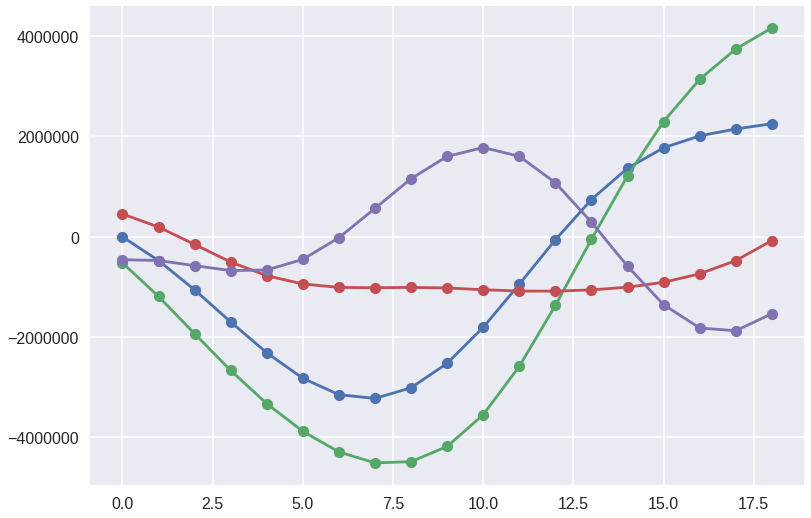

2017-10-17 14:49:02,129 - spiketag - DEBUG - no more undo
2017-10-17 14:49:02,566 - spiketag - DEBUG - no more undo
2017-10-17 14:49:02,605 - spiketag - DEBUG - no more undo
2017-10-17 14:49:02,624 - spiketag - DEBUG - no more undo
2017-10-17 14:49:02,655 - spiketag - DEBUG - no more undo
2017-10-17 14:49:02,700 - spiketag - DEBUG - no more undo
2017-10-17 14:49:04,287 - spiketag - DEBUG - no more undo
2017-10-17 14:49:05,240 - spiketag - DEBUG - no more undo
2017-10-17 14:49:06,201 - spiketag - DEBUG - no more undo
2017-10-17 14:49:06,699 - spiketag - DEBUG - no more undo


In [58]:
plot(x, '-o')

### get fet running `get_fet.py`

In [58]:
fet = np.fromfile('./fet.bin', dtype=np.int32)

In [59]:
fet = fet.reshape(-1, 7)

In [60]:
fet.shape

(42748, 7)

In [61]:
fet_info = fet[:,:2]
fet_info

array([[    26,     13],
       [    39,      5],
       [    68,      6],
       ..., 
       [556036,     32],
       [556055,     30],
       [556072,     27]], dtype=int32)

In [109]:
np.where(np.all(fet_info==np.array([9,24]), axis=1))

(array([10790]),)

In [110]:
fet_info[10790]

array([ 9, 24], dtype=int32)

In [112]:
fet_val[10790]

array([ 0.42457581,  0.0662384 ,  0.13998413, -0.25540161])

In [99]:
fet_info[53]

array([559,  24], dtype=int32)

In [111]:
spk_wav[:,10790][:,2:]

IndexError: index 10790 is out of bounds for axis 1 with size 20

In [62]:
fet_val = fet[:,2:6]/float(2**16)

In [63]:
fet_val

array([[ -9.95025635e-02,   7.73773193e-02,  -2.36053467e-02,
          1.81274414e-02],
       [ -1.52587891e-05,  -1.52587891e-05,  -1.52587891e-05,
         -1.52587891e-05],
       [  2.20031738e-02,   1.10321045e-02,   3.85894775e-02,
          2.24914551e-02],
       ..., 
       [ -1.14440918e-01,  -6.94274902e-03,   3.81164551e-02,
         -2.61688232e-02],
       [ -2.23083496e-02,  -4.40063477e-02,  -1.31774902e-01,
          6.48498535e-03],
       [  1.47537231e-01,   1.27105713e-01,   1.16485596e-01,
         -7.15637207e-03]])

In [64]:
label = fet[:,-1]

In [65]:
label[-100:]

array([80, 66,  9, 89,  4, 62, 95, 81, 87, 58, 70, 98, 81, 20, 29, 92, 32,
       81, 32, 57, 89, 57,  6, 76, 80, 79, 81, 20, 86, 43, 33, 10, 47, 81,
       15, 11, 48, 89, 81, 48, 21, 32, 81,  5,  1, 89, 57,  1,  4, 73, 57,
        5, 67, 89, 51, 90, 65, 32, 95, 37, 32, 60, 86, 99, 57, 52, 69, 32,
       67, 99, 80, 35,  1, 97, 81, 81, 82, 67, 57, 66, 43, 59, 57, 38,  1,
       37, 87, 29, 87, 11, 33, 97, 14, 33, 21, 80, 89, 79, 29, 70], dtype=int32)

In [75]:
x = spk_wav[:,1:].transpose(0,2,1).ravel().reshape(-1, 76)/float(2**13)

In [76]:
_fet_val = np.zeros(fet_val.shape)
for i, (t, grpNo) in enumerate(fet_info):
#     print i, (t,grpNo)
#     print grpNo
    if config.transfomer_constructed[grpNo]:
        _pca_comp, _shift, _scale = sorter.construct_transformer(groupNo=grpNo, ndim=4)
        _fet_val[i] = sorter._transform(x[i], _pca_comp, _shift, _scale)

In [77]:
_fet_val

array([[ -1.53017446e-01,  -1.19958207e-01,  -9.12351759e-03,
         -7.97430572e-02],
       [ -7.10705983e-02,  -2.23868163e-01,  -2.55577410e-01,
          1.31223996e+00],
       [  2.73046574e-01,  -6.82853574e-02,   4.00844605e-01,
         -2.24347399e-01],
       ..., 
       [ -4.84577212e-02,  -2.68569050e-02,   2.85472859e-04,
          1.15106418e-03],
       [ -8.52187700e-05,  -1.85615968e-03,  -1.46606445e-03,
         -1.15905267e-02],
       [ -5.83231176e-02,   2.46056376e-02,  -1.34293235e-03,
         -1.75121622e-02]])

In [78]:
fet_val

array([[ -1.53015137e-01,  -1.19949341e-01,  -9.10949707e-03,
         -7.97424316e-02],
       [ -7.10601807e-02,  -2.23861694e-01,  -2.55569458e-01,
          1.31222534e+00],
       [  2.73040771e-01,  -6.82830811e-02,   4.00833130e-01,
         -2.24334717e-01],
       ..., 
       [ -4.84466553e-02,  -2.68554688e-02,   2.74658203e-04,
          1.14440918e-03],
       [ -7.62939453e-05,  -1.84631348e-03,  -1.46484375e-03,
         -1.15814209e-02],
       [ -5.83190918e-02,   2.45971680e-02,  -1.34277344e-03,
         -1.75018311e-02]])

In [79]:
np.allclose(_fet_val, fet_val, atol=1e-4)

True

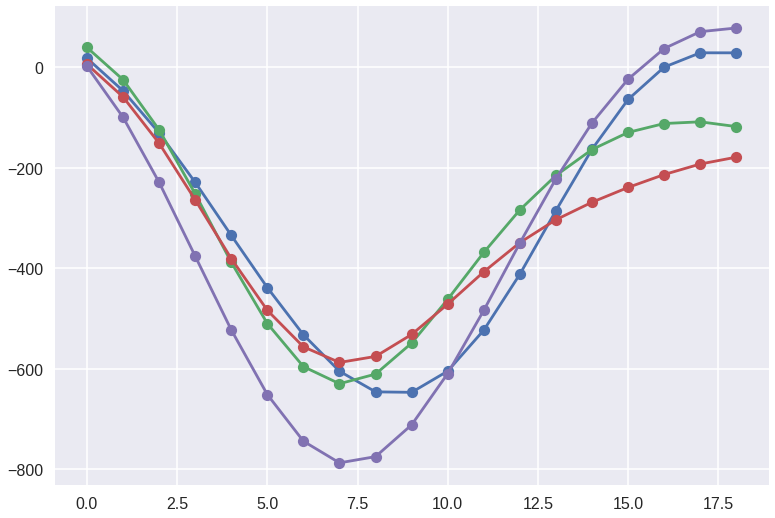

In [54]:
plot(sorter.model.spk[20][0], '-o')

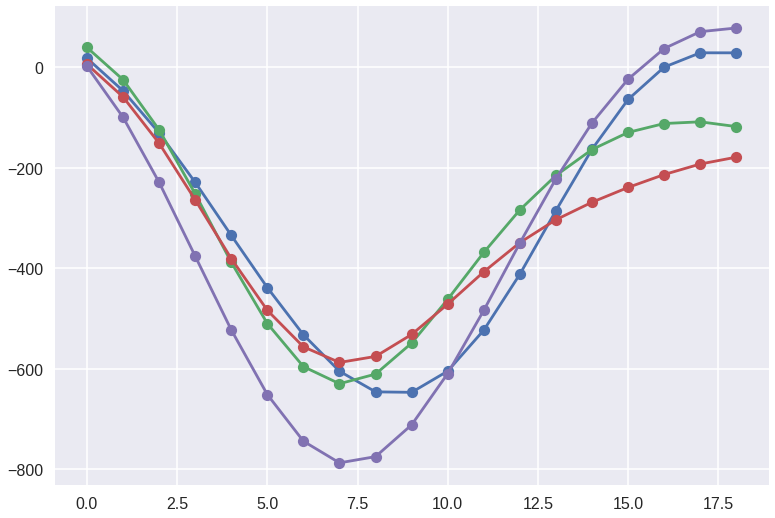

In [55]:
plot(spk_wav[0][1:]/float(2**13) , '-o')

In [56]:
fet_val[fet_info[:,1]==20]

array([[-0.00250244, -0.01405334, -0.06399536, -0.03611755],
       [-0.07981873,  0.03050232, -0.06677246, -0.00202942],
       [ 0.12345886, -0.1227417 ,  0.00271606,  0.0302887 ],
       ..., 
       [-0.13063049, -0.05680847, -0.07524109, -0.02125549],
       [-0.10162354, -0.03871155, -0.01298523, -0.00959778],
       [-0.02603149,  0.03518677, -0.08352661, -0.02519226]])

In [58]:
sorter.model.fet[20][0]

array([ 0.02485381,  0.05687669, -0.04208599, -0.01066198])

### classification

In [44]:
x = sorter.vq['points'][0]

In [45]:
# x[1:] = [0,0,0,0]

In [46]:
for i in range(40):
    config.vq[i] = x

2017-10-18 17:46:18,024 - spiketag - WARNING -  group 5 has no spikes! 
2017-10-18 17:46:27,068 - spiketag - INFO - received model modified event, refine spikes[group=7, global_ids=[   2    3    6    7   15   23   29   32   36   37   46   49   51   53   54
   56   61   64   65   66   71   73   74   75   78   87   95   98  100  101
  109  110  111  112  114  123  126  131  132  133  136  141  144  153  154
  160  166  168  170  172  173  176  189  192  194  195  196  199  201  202
  203  205  206  207  209  210  211  212  213  215  216  219  220  222  223
  224  226  228  229  230  234  237  240  241  244  245  246  250  256  257
  260  264  265  272  275  276  278  287  288  292  295  296  297  302  303
  304  306  311  319  320  321  323  326  330  334  337  345  347  348  349
  351  355  356  357  359  360  361  363  365  366  367  369  370  372  375
  376  377  378  379  380  384  385  388  389  393  394  397  400  401  402
  404  405  406  407  408  409  414  416  417  418  420  42

In [48]:
for i in range(20):
    config.vq[i] = sorter.vq['points'][7]

In [54]:
sorter.vq['points'][0]

array([[-0.01019156, -0.12588562,  0.0260838 ,  0.03621008],
       [-0.05696325,  0.06610309, -0.0152795 ,  0.02633984],
       [ 0.18422319,  0.04954461, -0.04198135, -0.04196046],
       [ 0.40777998,  0.17364698,  0.08411459,  0.13845786],
       [ 0.06401932, -0.0243188 ,  0.07044888,  0.00475412],
       [-0.11935767, -0.06246127,  0.01786523, -0.0405165 ],
       [ 0.34378244, -0.30743765,  0.11980039,  0.18903837],
       [ 0.06827812,  0.18489786,  0.09689144,  0.02894944],
       [-0.23914792,  0.03012344, -0.05053775,  0.01719984],
       [-0.01855739, -0.05885   ,  0.13153113, -0.02172236],
       [ 0.0058852 ,  0.15857857,  0.06753993,  0.00687078],
       [-0.15003725,  0.06290691,  0.00304856,  0.01024053],
       [ 0.10911199,  0.01599089, -0.04260325, -0.05255854],
       [-0.11978366, -0.11089286, -0.15889176, -0.02531939],
       [ 0.45506037, -0.41422341,  0.00242084,  0.0531831 ],
       [ 0.01828711, -0.04047037, -0.05517607, -0.05037932],
       [-0.17113911,  0.

In [57]:
config.vq[20]

array([[-0.015625 , -0.1328125,  0.0234375,  0.03125  ],
       [-0.0625   ,  0.0625   , -0.015625 ,  0.0234375],
       [ 0.1796875,  0.046875 , -0.046875 , -0.046875 ],
       [ 0.40625  ,  0.171875 ,  0.078125 ,  0.1328125],
       [ 0.0625   , -0.03125  ,  0.0703125,  0.       ],
       [-0.125    , -0.0625   ,  0.015625 , -0.046875 ],
       [ 0.34375  , -0.3125   ,  0.1171875,  0.1875   ],
       [ 0.0625   ,  0.1796875,  0.09375  ,  0.0234375],
       [-0.2421875,  0.0234375, -0.0546875,  0.015625 ],
       [-0.0234375, -0.0625   ,  0.125    , -0.0234375],
       [ 0.       ,  0.15625  ,  0.0625   ,  0.       ],
       [-0.15625  ,  0.0625   ,  0.       ,  0.0078125],
       [ 0.1015625,  0.015625 , -0.046875 , -0.0546875],
       [-0.125    , -0.1171875, -0.1640625, -0.03125  ],
       [ 0.453125 , -0.421875 ,  0.       ,  0.046875 ],
       [ 0.015625 , -0.046875 , -0.0625   , -0.0546875],
       [-0.171875 ,  0.03125  , -0.0546875,  0.015625 ],
       [ 0.5      , -0.15625  ,

2017-10-18 20:53:37,542 - spiketag - WARNING -  group 5 has no spikes! 
2017-10-18 20:55:45,498 - spiketag - WARNING -  group 5 has no spikes! 
2017-10-18 20:55:47,530 - spiketag - WARNING -  group 16 has no spikes! 
2017-10-18 20:56:48,479 - spiketag - WARNING -  group 16 has no spikes! 
2017-10-18 21:48:34,098 - spiketag - DEBUG - ctree view collapse cluster 1500 here


In [114]:
x = fet_val[10790]

In [115]:
x

array([ 0.42457581,  0.0662384 ,  0.13998413, -0.25540161])

In [123]:
%%timeit 
np.linalg.norm(x-config.vq[0], axis=1).argmin()

100 loops, best of 3: 6.51 ms per loop


In [66]:
fet_info[-50:]

array([[555371,     39],
       [555400,     32],
       [555408,     21],
       [555414,     28],
       [555415,     27],
       [555425,      0],
       [555438,     36],
       [555457,      6],
       [555468,     10],
       [555471,     26],
       [555472,     39],
       [555519,     13],
       [555520,     10],
       [555542,     39],
       [555545,     20],
       [555561,      6],
       [555581,     35],
       [555584,     30],
       [555589,     36],
       [555602,     39],
       [555642,     13],
       [555653,      7],
       [555659,      9],
       [555663,     32],
       [555678,     27],
       [555685,     28],
       [555693,     13],
       [555778,     30],
       [555782,     29],
       [555840,     14],
       [555846,     27],
       [555858,     32],
       [555866,     20],
       [555919,     36],
       [555922,     39],
       [555945,     25],
       [555951,     28],
       [555952,     27],
       [555952,     29],
       [555963,     13],


In [67]:
fet_val[-50:]

array([[ 0.00035095,  0.04072571,  0.04400635, -0.0231781 ],
       [-0.11125183, -0.03483582,  0.02294922, -0.04112244],
       [ 0.01016235, -0.01983643, -0.00106812,  0.05911255],
       [-0.07943726, -0.04951477,  0.01699829,  0.00860596],
       [-0.0854187 , -0.11132812,  0.07391357,  0.17671204],
       [-0.30238342,  0.30253601, -0.12712097,  0.01676941],
       [-0.06034851,  0.25585938,  0.10829163, -0.02503967],
       [-0.04309082, -0.05033875, -0.0317688 ,  0.05558777],
       [-0.04910278,  0.01387024, -0.02656555,  0.01809692],
       [-0.06967163, -0.06666565, -0.0206604 , -0.0249939 ],
       [-0.03041077, -0.03089905,  0.00248718,  0.02774048],
       [-0.06762695,  0.01335144, -0.03910828, -0.02850342],
       [ 0.02845764, -0.05038452,  0.00769043,  0.02053833],
       [ 0.02897644,  0.07904053,  0.01245117, -0.01597595],
       [-0.0466156 ,  0.05427551, -0.04934692, -0.03027344],
       [-0.03231812,  0.00656128,  0.01678467, -0.01412964],
       [ 0.10220337,  0.

In [78]:
_nnid = []
for i in range(2000):
    nnid = np.linalg.norm(fet_val[i]-config.vq[fet_info[i,1]], axis=1).argmin()
    _nnid.append(nnid)

In [77]:
_nnid = []
for i in range(-50,0,1):
    nnid = np.linalg.norm(fet_val[i]-sorter.vq['points'][0], axis=1).argmin()
    _nnid.append(nnid)
#     print nnid

In [83]:
np.array(_nnid)

array([31, 55, 66, 90, 40, 38, 65,  4, 94, 92, 38, 81, 79, 86, 48, 45, 75,
       17, 66, 23, 69, 59, 64, 55, 64, 40, 66, 70, 38, 93, 29, 47, 48, 59,
       99, 61, 65, 81, 83, 59, 23, 32, 70, 32, 32, 58, 72, 30, 96, 70])

In [80]:
np.nonzero(label[:2000]-np.array(_nnid))

(array([ 619, 1199]),)

In [89]:
label[1199]

1

In [90]:
_nnid[1199]

48

In [91]:
i = 1199
distance = np.linalg.norm(fet_val[i]-config.vq[fet_info[i,1]], axis=1)

In [92]:
distance[1]

0.051848929652045336

In [93]:
distance[48]

0.051819031875696267

2017-10-23 15:21:34,044 - spiketag - INFO - received model modified event, refine spikes[group=7, global_ids=[   2    3    6    7   15   23   29   32   36   37   46   49   51   53   54
   56   61   64   65   66   73   75   78   79   87   95   98  100  101  109
  110  111  112  114  123  126  131  132  133  136  141  144  153  154  160
  166  168  170  172  173  176  189  192  194  195  196  199  201  202  203
  205  207  208  209  210  211  212  213  215  216  219  220  222  223  224
  226  228  229  230  234  237  240  241  244  245  246  250  256  260  264
  265  272  275  276  278  287  288  292  295  296  297  302  303  304  306
  311  319  320  321  323  326  330  334  337  345  347  348  351  355  356
  357  359  361  363  367  369  370  372  375  376  379  380  384  385  388
  393  394  397  400  401  402  404  406  407  409  417  418  420  425  426
  428  435  436  446  447  452  453  456  457  463  464  465  474  479  480
  481  482  486  489  492  495  497  499  501  503  505